In [25]:
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch
import mymodels
from torchvision import transforms 
import os
from torchvision import datasets
from torch.utils.data import dataloader
import matplotlib.pyplot as plt
data_dir=""
batchsize = 2
num_epochs = 10
use_gpu = torch.cuda.is_available()

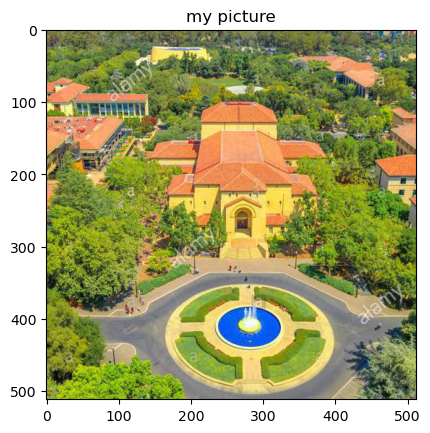

In [26]:
from matplotlib import pyplot as plt
import cv2
import skimage

img = plt.imread("train\\google\\1328\\19.palo-alto-california-united-states-august-13-2018-aerial-view-of-the-fountain-and-memorial-auditorium-of-stanford-university-campus-seen-from-hoover-tower-observatory-vertical-shot-PK98B7.jpg")
#image=skimage.img_as_float(img)
#img = img.astype(float)
plt.imshow(img)
plt.title('my picture')
plt.show()
# "\\?\F:\univdataset\University-Release\University-Release\train\google\1328\19.palo-alto-california-united-states-august-13-2018-aerial-view-of-the-fountain-and-memorial-auditorium-of-stanford-university-campus-seen-from-hoover-tower-observatory-vertical-shot-PK98B7.jpg"


In [27]:
pwd

'F:\\univdataset\\University-Release'

In [28]:
#!pip install scikit-image

In [29]:
#img = cv2.imread('F:\\univdataset\\University-Release\\University-Release\\train\\google\\1328\\19.palo-alto-california-united-states-august-13-2018-aerial-view-of-the-fountain-and-memorial-auditorium-of-stanford-university-campus-seen-from-hoover-tower-observatory-vertical-shot-PK98B7.jpg')


In [30]:
h, w = 256, 256
image_datasets  = {}
def data_transforms(phase):
    if phase == 'train':
        transform = transforms.Compose([
            transforms.Resize((256,256), interpolation=3),
            transforms.Pad(10),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    return transform
image_datasets['train'] = datasets.ImageFolder(os.path.join(data_dir, 'train'),
                                          data_transforms('train'))

In [31]:

#{x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms(x)) 
  #                for x in [TRAIN, VAL, TEST]}

In [32]:
dataloaders = {x: torch.utils.data.dataloader.DataLoader(image_datasets[x], batch_size=1,
                                             shuffle=True, num_workers=8) # 8 workers may work faster
              for x in ['train']}

train


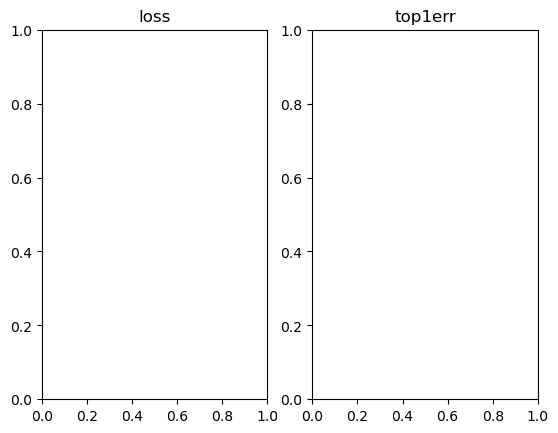

In [33]:
class_names = image_datasets['train'].classes
dataset_sizes = {x: len(image_datasets[x]) for x in ['train']}

model = mymodels.ft_net(len(class_names))
criterion = nn.CrossEntropyLoss()

for phase in dataloaders:
    print(phase)
    print(dataloaders['train'])
    
lr = 0.05
optim_name = optim.SGD
ignored_params = list(map(id, model.parameters()))
base_params = filter(lambda p: id(p) not in ignored_params, model.parameters())
classifier_params = model.parameters()
optimizer = optim_name([
    {'params': base_params, 'lr': 0.1 * lr},
    {'params': classifier_params, 'lr': lr}
], weight_decay=5e-4, momentum=0.9, nesterov=True)

y_loss = {'train': []}  # loss history
y_err = {'train': []}

x_epoch = []
fig = plt.figure()
ax0 = fig.add_subplot(121, title="loss")
ax1 = fig.add_subplot(122, title="top1err")

def draw_curve(current_epoch):
    x_epoch.append(current_epoch)
    ax0.plot(x_epoch, y_loss['train'], 'bo-', label='train')
    ax1.plot(x_epoch, y_err['train'], 'bo-', label='train')
    if current_epoch == 0:
        ax0.legend()
        ax1.legend()
    fig.savefig(os.path.join('', 'train.jpg'))


def save_network(network, epoch_label):
    save_filename = 'net_%s.pth' % epoch_label
    save_path = os.path.join('', save_filename)
    torch.save(network.cpu().state_dict(), save_path)
    if torch.cuda.is_available():
        network.cuda()


In [34]:
import getopt
import sys
from torch.autograd import Variable
#opt.batchSize = 8192
# Iterate over data.
for epoch in range(num_epochs):
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)
            # Each epoch has a training and validation phase
            model.train(True)  # Set model to training mode
            running_loss = 0.0
            running_corrects = 0.0
            count = 0
            for data in dataloaders['train']:
                # get a batch of inputs
                if count > 10:
                    break
                count = count + 1
                inputs, labels = data
                now_batch_size,c,h,w = inputs.shape
                if now_batch_size < batchsize:  # skip the last batch
                    continue
                # print(inputs.shape)
                # wrap them in Variable, if gpu is used, we transform the data to cuda.
                use_gpu=False
                if use_gpu:
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                # zero the parameter gradients
                optimizer.zero_grad()

                #-------- forward --------
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)
                del inputs

                #-------- backward + optimize -------- 
                # only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()
                
                running_loss += loss.item() * now_batch_size
                del loss
                running_corrects += float(torch.sum(preds == labels.data))

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            y_loss[phase].append(epoch_loss)
            y_err[phase].append(1.0 - epoch_acc)

            # deep copy the model
            last_model_wts = model.state_dict()
            if epoch % 10 == 9:
                save_network(model, epoch)
            draw_curve(epoch)
            

Epoch 0/9
----------
train Loss: 0.0000 Acc: 0.0000
Epoch 1/9
----------
train Loss: 0.0000 Acc: 0.0000
Epoch 2/9
----------
train Loss: 0.0000 Acc: 0.0000
Epoch 3/9
----------
train Loss: 0.0000 Acc: 0.0000
Epoch 4/9
----------
train Loss: 0.0000 Acc: 0.0000
Epoch 5/9
----------
train Loss: 0.0000 Acc: 0.0000
Epoch 6/9
----------
train Loss: 0.0000 Acc: 0.0000
Epoch 7/9
----------
train Loss: 0.0000 Acc: 0.0000
Epoch 8/9
----------
train Loss: 0.0000 Acc: 0.0000
Epoch 9/9
----------
train Loss: 0.0000 Acc: 0.0000


In [19]:
#print(torchvision.__version__)